## Visualization

In [1]:
import os
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

/home/seanyu/.conda/envs/tf18_keras/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/seanyu/.conda/envs/tf18_keras/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/seanyu/.conda/envs/tf18_keras/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/seanyu/.conda/envs/tf18_keras/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/seanyu/.conda/envs/tf18_keras/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  retu

In [2]:
def vis_accuracy(result_dir, log_prefix, result_prefix):
    logged_files = [os.path.join(result_dir,i) for i in os.listdir(result_dir) if log_prefix in i]
    result_files = [os.path.join(result_dir,i) for i in os.listdir(result_dir) if result_prefix in i]
    
    df = pd.DataFrame()    
    for f in logged_files:
        tmp_df = pd.read_csv(f)
        if tmp_df['valid_accuracy'].isna()[0]:
            # prevent bugged log
            pass
        else:
            tmp_df['epoch'] = np.arange(1, len(tmp_df)+1)
            tmp_df['split_id'] = int(re.findall(string=os.path.basename(f), pattern='[0-9]+')[0])
            df = pd.concat((df, tmp_df))
    df.reset_index(drop = True, inplace=True)

    for i in df.split_id.unique():
        plt.plot(df[df['split_id'] == i].epoch,  df[df['split_id'] == i].valid_accuracy)
    plt.grid()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.show()
    
    ## use prediction results that have best loss to compute auc (not guarantee the best accuracy)
    bins = 0.005
    df_acc_thres = pd.DataFrame({'thres':np.arange(0,1,bins)})
    counter = 0
    auc_ = []
    acc_iter_max = []
    for f in result_files:
        tmp_df = pd.read_csv(f)
        if tmp_df['y_pred'].isna()[0]:
            pass
        else:
            this_auc = roc_auc_score(y_true=tmp_df['cate'], y_score=tmp_df['y_pred'])
            auc_.append(this_auc)
            
            accuracy_list = [(tmp_df['cate'].values == (tmp_df['y_pred'].values >= thres)*1).sum() / len(tmp_df) for thres in np.arange(0,1,bins)]
            df_acc_thres = pd.concat((df_acc_thres, pd.DataFrame({str(counter):accuracy_list})), axis = 1)
            acc_iter_max.append(max(accuracy_list))
            counter += 1
        
    print("== Experiment dir: %s - prefix: %s ==" % (result_dir, log_prefix))
    print("Max validation accuracy over splits")
    print(df.groupby('split_id')['valid_accuracy'].max())
    print("AUC of runs: " + str(auc_))
    
    accuracy_array = np.array(df.groupby('split_id')['valid_accuracy'].max())
    accuracy_avg = np.mean(accuracy_array)
    accuracy_std = np.std(accuracy_array)
    auc_avg = np.mean(auc_)
    auc_std = np.std(auc_)
    print("Overall Accuracy: %.3f+/-(%.2f); AUC: %.3f+/-(%.2f)" % (accuracy_avg, accuracy_std, auc_avg, auc_std))
    print("Accuracy of max iter threshold: %.3f+/-(%.2f)" % (np.mean(acc_iter_max), np.std(acc_iter_max)))
    
    return df
   

## General Setting
Experiments with augmentations during training time including
* Flip (left/right, up/down)
* Contrast Normalization
* Pixel intensity modification
* Gaussian blur
* Affine: rotation, scaling  

Experiments with weights transfer were transferred from imagenet (https://github.com/tensorflow/models/tree/master/research/slim)


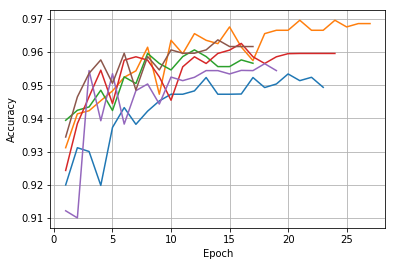

== Experiment dir: /data/seanyu/UPMC_pathology/result/resnet50_256/ - prefix: log_sp ==
Max validation accuracy over splits
split_id
0    0.956519
1    0.960685
2    0.963710
3    0.969624
5    0.962634
6    0.953427
Name: valid_accuracy, dtype: float64
AUC of runs: [0.9850243772962854, 0.9740122938250864, 0.9916549996315672, 0.9908362955318579, 0.9885108807109491, 0.9892191888551848, 0.9907497815920654]
Overall Accuracy: 0.961+/-(0.01); AUC: 0.987+/-(0.01)
Accuracy of max iter threshold: 0.957+/-(0.01)


In [3]:
result_dir = "/data/seanyu/UPMC_pathology/result/resnet50_256/"
log_prefix = "log_sp"
result_prefix = "result_sp"
df_get = vis_accuracy(result_dir=result_dir, log_prefix=log_prefix, result_prefix=result_prefix)

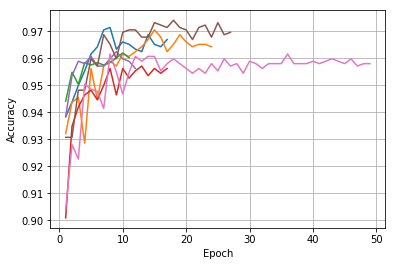

== Experiment dir: /data/seanyu/UPMC_pathology/result/resnet50_256/ - prefix: log_randomsp ==
Max validation accuracy over splits
split_id
0    0.971429
1    0.961607
2    0.974107
3    0.970536
4    0.957143
5    0.961990
6    0.962500
Name: valid_accuracy, dtype: float64
AUC of runs: [0.9887355291767057, 0.9736146206734443, 0.9903111594288064, 0.9944246929541047, 0.9707204560145738, 0.9878356937180466, 0.9892313568784158]
Overall Accuracy: 0.966+/-(0.01); AUC: 0.985+/-(0.01)
Accuracy of max iter threshold: 0.969+/-(0.01)


In [4]:
result_dir = "/data/seanyu/UPMC_pathology/result/resnet50_256/"
log_prefix = "log_randomsp"
result_prefix = "result_randomsp"
df_get = vis_accuracy(result_dir=result_dir, log_prefix=log_prefix, result_prefix=result_prefix)

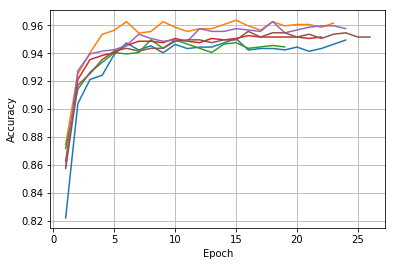

== Experiment dir: /data/seanyu/UPMC_pathology/result/inceptionResnet_256/ - prefix: log_sp ==
Max validation accuracy over splits
split_id
0    0.962634
1    0.949530
2    0.955578
3    0.963575
5    0.952554
6    0.950403
Name: valid_accuracy, dtype: float64
AUC of runs: [0.9941047455401422, 0.992270801943189, 0.9930826762950409, 0.9921071742537171, 0.9912042839238919, 0.9925716211661612, 0.9908992800713854]
Overall Accuracy: 0.956+/-(0.01); AUC: 0.992+/-(0.00)
Accuracy of max iter threshold: 0.967+/-(0.01)


In [5]:
result_dir = "/data/seanyu/UPMC_pathology/result/inceptionResnet_256/"
log_prefix = "log_sp"
result_prefix = "result_sp"
df_get = vis_accuracy(result_dir=result_dir, log_prefix=log_prefix, result_prefix=result_prefix)

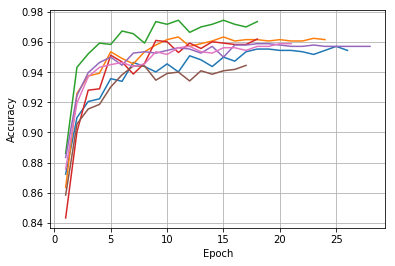

== Experiment dir: /data/seanyu/UPMC_pathology/result/inceptionResnet_256/ - prefix: log_randomsp ==
Max validation accuracy over splits
split_id
0    0.957143
1    0.958929
2    0.944515
3    0.963393
4    0.961990
5    0.974490
6    0.958929
Name: valid_accuracy, dtype: float64
AUC of runs: [0.9893488864077099, 0.9920226831991539, 0.9913836163836164, 0.9906417112299465, 0.9907078215901746, 0.9916333666333665, 0.9759358288770053]
Overall Accuracy: 0.960+/-(0.01); AUC: 0.989+/-(0.01)
Accuracy of max iter threshold: 0.969+/-(0.01)


In [6]:
result_dir = "/data/seanyu/UPMC_pathology/result/inceptionResnet_256/"
log_prefix = "log_randomsp"
result_prefix = "result_randomsp"
df_get = vis_accuracy(result_dir=result_dir, log_prefix=log_prefix, result_prefix=result_prefix)

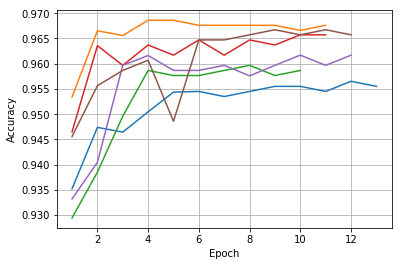

== Experiment dir: /data/seanyu/UPMC_pathology/result/inceptionResnet_adam/ - prefix: log_sp ==
Max validation accuracy over splits
split_id
0    0.961694
1    0.959677
2    0.966734
3    0.968616
5    0.965726
6    0.956519
Name: valid_accuracy, dtype: float64
AUC of runs: [0.9863561646387178, 0.9815725962371828, 0.9906164799941051, 0.990492298283836, 0.986346131935741, 0.9810852713178295, 0.9923545543310177]
Overall Accuracy: 0.963+/-(0.00); AUC: 0.987+/-(0.00)
Accuracy of max iter threshold: 0.957+/-(0.01)


In [7]:
result_dir = "/data/seanyu/UPMC_pathology/result/inceptionResnet_adam/"
log_prefix = "log_sp"
result_prefix = "result_sp"
df_get = vis_accuracy(result_dir=result_dir, log_prefix=log_prefix, result_prefix=result_prefix)

## No pretrain!
* I fonund that SGD will need modifiy a lot (hand-tuning), so in scratch version, optimizer is switch to Adam

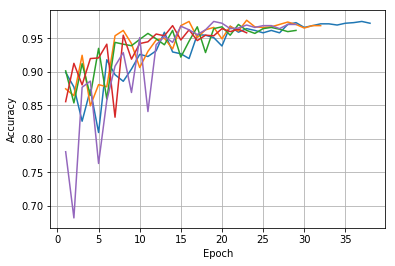

== Experiment dir: /data/seanyu/UPMC_pathology/result/resnet50_RandomSplit_FromScratch// - prefix: log_randomsp ==
Max validation accuracy over splits
split_id
0    0.975000
1    0.975000
2    0.968750
3    0.976786
4    0.970536
Name: valid_accuracy, dtype: float64
AUC of runs: [0.991075101369219, 0.9902670858553211, 0.9934183463595229, 0.9933008168302286, 0.99042134336252]
Overall Accuracy: 0.973+/-(0.00); AUC: 0.992+/-(0.00)
Accuracy of max iter threshold: 0.974+/-(0.00)


In [8]:
result_dir = "/data/seanyu/UPMC_pathology/result/resnet50_RandomSplit_FromScratch//"
log_prefix = "log_randomsp"
result_prefix = "result_randomsp"
df_get = vis_accuracy(result_dir=result_dir, log_prefix=log_prefix, result_prefix=result_prefix)